<a href="https://colab.research.google.com/github/ennioguzman91/DeepLearning/blob/master/lab01_audio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello world")

hello world


In [2]:
import IPython.display as ipd # Serve per chi lavora con google colab, per sentire da colab il .wav file
from matplotlib import pyplot as plt

In [4]:
from scipy.io import wavfile as wav # manipolare dati di vari tipo (questo caso audio)
from scipy.fft import rfft, fft, irfft, ifft, fftfreq # library of fourier transform
from scipy.signal import fftconvolve

import numpy as np

# Basic i/o

In [5]:
hello_rate, hello = wav.read('audio/hello.wav')

In [7]:
hello_rate # la frequenza di campionamento (22050 campioni / secondo)

22050

In [8]:
hello.shape # 2 - per ogni orechio

(18859, 2)

In [9]:
# adesso ci interessa solo avere un audio monolocale, allora prendiamo solo un canale

hello = hello[:,0] # solo la prima cola di dati

In [54]:
# per ascoltarla in google colab
ipd.Audio(hello, rate=hello_rate*0.5)

In [56]:
# per salvarlo in locale
wav.write('audio/hello_slow.wav', rate = int(hello_rate), data=hello)

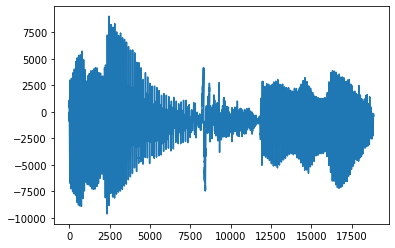

In [16]:
plt.plot(hello); plt.show()

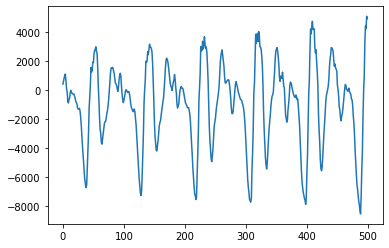

In [17]:
plt.plot(hello[0:500]); plt.show() 

importare e visualizzare "whistle" e "voice"

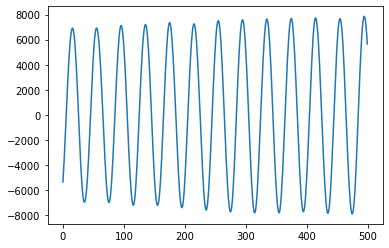

In [26]:
whistle_rate, whistle = wav.read('audio/whistle.wav')
whistle.shape
plt.plot(whistle[40000:40500]); plt.show()

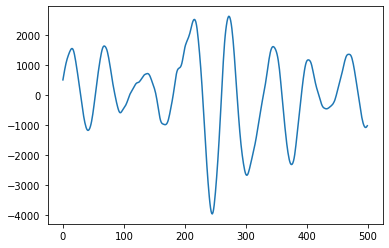

In [34]:
voice_r, voice = wav.read('audio/voice.wav')
plt.plot(voice[40000:40500]); plt.show()

# Fourier analysis

In [57]:
voice_fft = fft(voice)

In [58]:
voice.shape

(120768,)

In [29]:
voice_fft.shape

(120768,)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


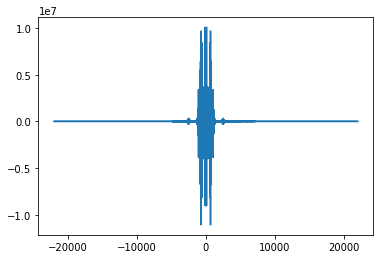

In [59]:
voice_freqs = fftfreq(len(voice), 1.0/voice_r)
plt.plot(voice_freqs, voice_fft)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


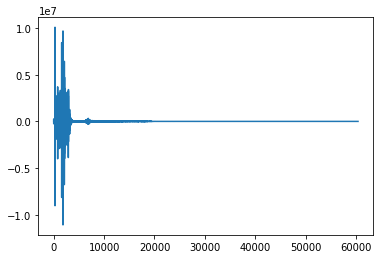

In [36]:
voice_ft = rfft(voice)
plt.plot(voice_ft)

visualizzare i primi 10000 elementi della trasformata fourier di voice e di whistle

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


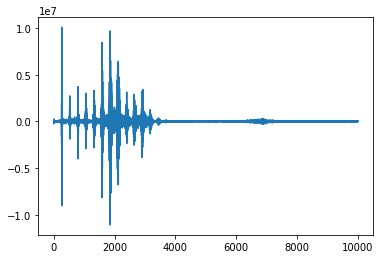

In [41]:
plt.plot(voice_ft[0:10000])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


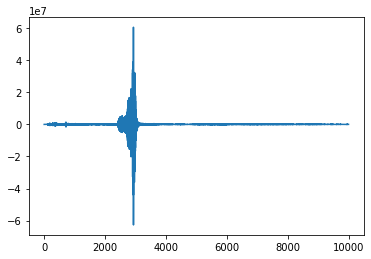

In [42]:
whistle_ft = rfft(whistle)
plt.plot(whistle_ft[0:10000])

# Low pass / high pass filtering

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


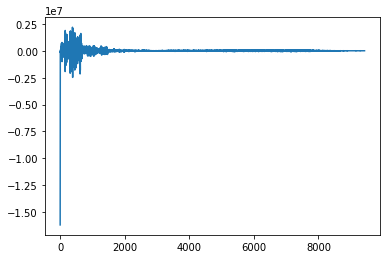

In [43]:
hello_ft = rfft(hello) # se transforma en el dominio de la frequencia
plt.plot(hello_ft)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


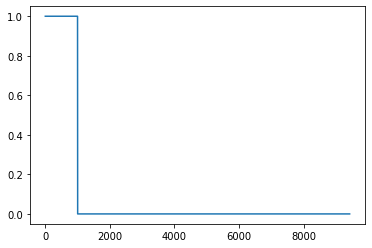

In [60]:
# Creamos un low pass filter
lp = hello_ft*0
lp[0:1000] = 1 # se escojen las primeras 1000 frequencias
plt.plot(lp)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


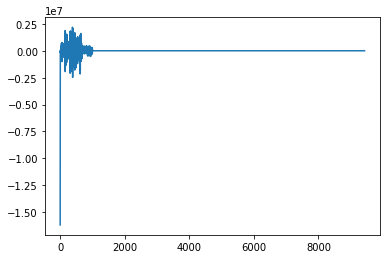

In [45]:
hello_ft_lp = hello_ft*lp
plt.plot(hello_ft_lp)

riportare hello_ft_lp nel dominio temporale (transformata inversa) e ascoltare

In [46]:
# Se escucha en colab
hello_lp = irfft(hello_ft_lp) # dominio frequancia -> dominio tiempo
ipd.Audio(hello_lp, rate=hello_rate)

De este modo se compacta la información

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


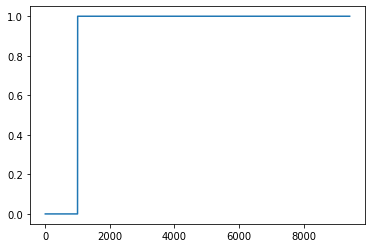

In [48]:
# Creamos un high pass filter
hp = hello_ft*0
hp[1000:] = 1 # se escojen las primeras 1000 frequencias (posiammo difinire il vettore come hp= 1-lp)
plt.plot(hp)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


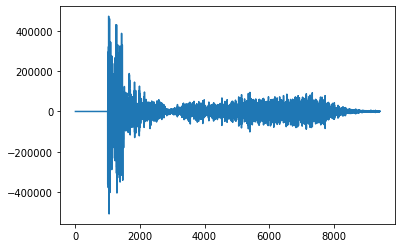

In [49]:
hello_ft_hp = hello_ft*hp
plt.plot(hello_ft_hp)

In [50]:
# Se escucha en colab
hello_hp = irfft(hello_ft_hp) # dominio frequancia -> dominio tiempo
ipd.Audio(hello_hp, rate=hello_rate)

# Convolution

In [62]:
violin_r, violin = wav.read('audio/violin.wav')
ipd.Audio(violin, rate=violin_r)

In [65]:
violin_r

44100

In [70]:
violin.shape

(220500,)

In [72]:
violin = violin[0:int(violin_r*2.0)]
ipd.Audio(violin, rate=violin_r)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


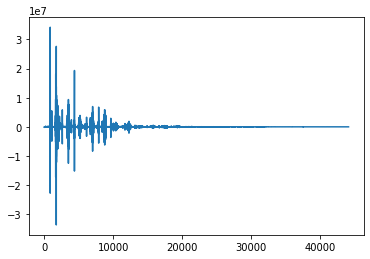

In [74]:
plt.plot(rfft(violin))

In [52]:
bang1_r, bang1 = wav.read('audio/bang1.wav')
ipd.Audio(bang1, rate=bang1_r)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


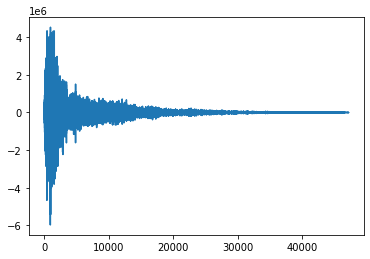

In [75]:
plt.plot(rfft(bang1))

In [73]:
conv1 = fftconvolve(bang1, violin)
ipd.Audio(conv1, rate=violin_r)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


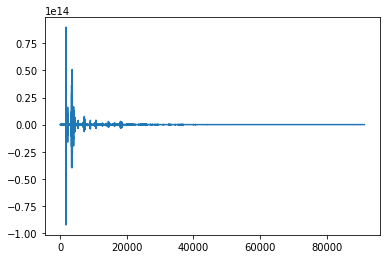

In [76]:
plt.plot(rfft(conv1))

In [53]:
bang2_r, bang2 = wav.read('audio/bang2.wav')
ipd.Audio(bang2, rate=bang2_r)